# Visualizing data with xcube viewer in EuroDataCube
### Brought to you by Brockmann Consult GmbH
This Notebook demonstrates how to use the features of the xcube JupyterLab integration.
The Notebook demonstrates three scenarios how xcube Viewer is utilized in JupyterLab.
In particular, we open xcube Viewer for any `xarray.Dataset` instances 

1. opened or otherwise created in this Notebook (in-memory datasets);
2. persisted in this Notebooks's workspace or from other sources (saved datasets).
3. open a dataset served by an external xcube server and published in a xcube viewer.

For this to work in EuroDataCube, the following requirements must be satisfied:

* you must have an active EuroDataCube EOxHub Workspace
* you must have an active xcube Viewer subscription

In [1]:
import numpy as np
import xarray as xr

from xcube.webapi.viewer import Viewer
from xcube.core.store import new_data_store
from xcube.core.select import select_subset

We create some datasets so we have something to show. We use the xcube datastore framework here to open the dataset, but it could also be opened by other means, e.g., `xr.open_dataset()`, provided it has variables with dimensions ["time", "y", "x"] or ["y", "x"]. 

If you have your own bucket, which you wish to access and the access credentials are not saved as environment variables, you can add them to the parameters of `new_data_store`:
```
store = new_data_store("s3",
                       root="PATH_TO_YOUR_S3_BUCKET, 
                       storage_options=dict(anon=False, 
                                            key="YOUR_ACCESS_KEY_ID", 
                                            secret="YOUR_ACCESS_KEY_SECRET")
                           ) 
```

In [2]:
store = new_data_store("s3", 
                       root="xcube-dcfs/edc-xc-viewer-data",
                       storage_options={"anon": True})
store.list_data_ids()

['Aegean.zarr',
 'Aegean_2.zarr',
 'Bodensee_2.zarr',
 'C3S_ERA-5_t2m.zarr',
 'CCI-CHL.zarr',
 'CMEMS_OC_CHL.zarr',
 'CMEMS_OC_CHL_2.zarr',
 'GHSL_2018.zarr',
 'HH_CityCube_RGB.zarr',
 'NorthSea_2021-04_08.zarr']

In [3]:
dataset = store.open_data('HH_CityCube_RGB.zarr')

In [4]:
dataset

<xarray.Dataset>
Dimensions:    (time: 54, lat: 1536, lon: 2560, bnds: 2)
Coordinates:
  * lat        (lat) float64 53.85 53.85 53.85 53.85 ... 53.39 53.39 53.39 53.39
  * lon        (lon) float64 9.7 9.7 9.701 9.701 ... 10.47 10.47 10.47 10.47
  * time       (time) datetime64[ns] 2021-03-03 2021-03-07 ... 2021-10-01
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(54, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    B02        (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    B03        (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    B04        (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    B05        (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    B06        (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    B08        (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    CLD        (time, lat, lon) uint8 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    MCI        (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    NDVI       (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    SCL        (time, lat, lon) uint8 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                CF-1.7
    date_created:               2021-10-02T17:07:09.898152
    geospatial_bounds:          POLYGON((9.700000000380166 53.39000000038017,...
    geospatial_bounds_crs:      CRS84
    geospatial_lat_max:         53.85471028749284
    geospatial_lat_min:         53.39000000038017
    ...                         ...
    processing_level:           L2A
    time_coverage_duration:     P216DT0H0M0S
    time_coverage_end:          2021-10-03T00:00:00+00:00
    time_coverage_resolution:   P4DT0H0M0S
    time_coverage_start:        2021-03-01T00:00:00+00:00
    title:                      Hamburg City Cube 2021

In [5]:
dataset_subset = select_subset(
    dataset,
    time_range=["2021-08-01 00:00:00", 
                "2021-08-31 23:59:59"],
    var_names=["B04", "B03", "B02", "NDVI"]
)
dataset_subset.attrs["title"] = "Hamburg NDVI and RGB Subset"
dataset_subset

<xarray.Dataset>
Dimensions:    (time: 8, lat: 1536, lon: 2560, bnds: 2)
Coordinates:
  * lat        (lat) float64 53.85 53.85 53.85 53.85 ... 53.39 53.39 53.39 53.39
  * lon        (lon) float64 9.7 9.7 9.701 9.701 ... 10.47 10.47 10.47 10.47
  * time       (time) datetime64[ns] 2021-08-02 2021-08-06 ... 2021-08-30
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(8, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    B02        (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    B03        (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    B04        (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    NDVI       (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                CF-1.7
    date_created:               2021-10-02T17:07:09.898152
    geospatial_bounds:          POLYGON((9.700000000380166 53.39000000038017,...
    geospatial_bounds_crs:      CRS84
    geospatial_lat_max:         53.85471028749284
    geospatial_lat_min:         53.39000000038017
    ...                         ...
    processing_level:           L2A
    time_coverage_duration:     P216DT0H0M0S
    time_coverage_end:          2021-10-03T00:00:00+00:00
    time_coverage_resolution:   P4DT0H0M0S
    time_coverage_start:        2021-03-01T00:00:00+00:00
    title:                      Hamburg NDVI and RGB Subset

---
**Scenario 1**: Open xcube Viewer for a dataset instances opened or otherwise created in this Notebook (in-memory datasets).   
**Documentation about the functionalities of xcube viewer is available here:** https://xcube.readthedocs.io/en/latest/viewer.html#functionality

In [6]:
viewer = Viewer()

In [7]:
viewer.add_dataset(dataset)
viewer.add_dataset(dataset_subset)

'b715c9a8-36bd-4bbd-99b6-2cdac12fc2b7'

You can click on the viewer link to open xcube Viewer in a new browser tab:

In [8]:
viewer.info()

Server: https://hub.eox.at/user/1e9edb3d-e59c-478e-b2ed-d2aa826f5f1b/proxy/8000
Viewer: https://hub.eox.at/user/1e9edb3d-e59c-478e-b2ed-d2aa826f5f1b/proxy/8000/viewer/?serverUrl=https://hub.eox.at/user/1e9edb3d-e59c-478e-b2ed-d2aa826f5f1b/proxy/8000


You can also open xcube Viewer inlined here:

In [9]:
viewer.show()

404 GET /viewer/config/config.json (127.0.0.1): xcube viewer has not been been configured
404 GET /viewer/config/config.json (127.0.0.1) 3.54ms


To stop the server and viewer:

In [10]:
viewer.stop_server()

---
**Scenario 2**: Open xcube Viewer for a dataset instances persisted in this Notebooks's workspace or from other sources (saved datasets).

In [11]:
dataset_subset.to_zarr("hamburg-NDVI-RGB-subset.zarr", mode="w")

In [12]:
local_store = new_data_store("file", root="./.") # adjust the path if you store the subset somewhere else
local_store.list_data_ids()

['hamburg-NDVI-RGB-subset.zarr']

In [13]:
dataset = local_store.open_data('hamburg-NDVI-RGB-subset.zarr')

In [14]:
viewer = Viewer()

In [15]:
viewer.add_dataset(dataset)

'a358cc2e-ba8a-4f3c-94f6-d4f6af4191ce'

You can click on the viewer link to open xcube Viewer in a new browser tab:

In [19]:
viewer.info()

Server: https://hub.eox.at/user/1e9edb3d-e59c-478e-b2ed-d2aa826f5f1b/proxy/8001
Viewer: https://hub.eox.at/user/1e9edb3d-e59c-478e-b2ed-d2aa826f5f1b/proxy/8001/viewer/?serverUrl=https://hub.eox.at/user/1e9edb3d-e59c-478e-b2ed-d2aa826f5f1b/proxy/8001


You can also open xcube Viewer inlined here:

In [20]:
viewer.show()

404 GET /viewer/config/config.json (127.0.0.1): xcube viewer has not been been configured
404 GET /viewer/config/config.json (127.0.0.1) 1.49ms
Uncaught exception GET /datasets?details=1 (127.0.0.1)
HTTPServerRequest(protocol='http', host='hub.eox.at', method='GET', uri='/datasets?details=1', version='HTTP/1.1', remote_ip='127.0.0.1')
Traceback (most recent call last):
  File "/home/conda/eurodatacube6/7f27d6ca559de8798df237a2114a9440d8371b3c509a5646081d0b9c242e4f6c-20230620-101539-524672-159-xcube/lib/python3.11/site-packages/tornado/web.py", line 1786, in _execute
    result = await result
             ^^^^^^^^^^^^
  File "/home/conda/eurodatacube6/7f27d6ca559de8798df237a2114a9440d8371b3c509a5646081d0b9c242e4f6c-20230620-101539-524672-159-xcube/lib/python3.11/site-packages/xcube/server/webservers/tornado.py", line 354, in get
    await self._call_method('get', *args, **kwargs)
  File "/home/conda/eurodatacube6/7f27d6ca559de8798df237a2114a9440d8371b3c509a5646081d0b9c242e4f6c-20230620-

In [21]:
viewer.stop_server()

---
**Scenario 3**: Use custom server configuration to start server and pass it to the viewer constructor. In this case, we have created a local file with the configuration and load it as a dictionary and pass it to the viewer. 

The custom configuration allows you to predefine your value ranges, the colormaps that should be used as well as which bands can be used to create an RGB image, then the RGB switch in the viewer will allow to show the RGB imgage. 

If you do not have a server-config.yaml file in your directory, please create one with the following content: 

```yaml
DataStores:
  - Identifier: edc
    StoreId: file
    StoreParams:
      root: "./." # adjust if you have stored the subset elsewhere
    Datasets:
      - Path: hamburg-NDVI-RGB-subset-1.zarr # adjust if you have named it differently.
        Style: default


Styles:
  - Identifier: default
    ColorMappings:
      NDVI:
        ColorBar: RdYlGn
        ValueRange: [-1., 1.]
      rgb:
        Red:
          Variable: B04
          ValueRange: [0., 0.25]
        Green:
          Variable: B03
          ValueRange: [0., 0.25]
        Blue:
          Variable: B02
          ValueRange: [0., 0.25]

```

To get details about the server configuration file, please checkout the documentation: https://xcube.readthedocs.io/en/latest/cli/xcube_serve.html     

In [22]:
from xcube.util.config import load_configs

In [23]:
viewer = Viewer(server_config=load_configs("server-config.yaml"))

You can also open xcube Viewer inlined here:

In [24]:
viewer.show()

404 GET /viewer/config/config.json (127.0.0.1): xcube viewer has not been been configured
404 GET /viewer/config/config.json (127.0.0.1) 1.60ms
/home/conda/eurodatacube6/7f27d6ca559de8798df237a2114a9440d8371b3c509a5646081d0b9c242e4f6c-20230620-101539-524672-159-xcube/lib/python3.11/site-packages/xcube/core/_tile2.py:491: RuntimeWarning: invalid value encountered in cast
  var_tile_rgba[..., 0] = 255 * r
/home/conda/eurodatacube6/7f27d6ca559de8798df237a2114a9440d8371b3c509a5646081d0b9c242e4f6c-20230620-101539-524672-159-xcube/lib/python3.11/site-packages/xcube/core/_tile2.py:492: RuntimeWarning: invalid value encountered in cast
  var_tile_rgba[..., 1] = 255 * g
/home/conda/eurodatacube6/7f27d6ca559de8798df237a2114a9440d8371b3c509a5646081d0b9c242e4f6c-20230620-101539-524672-159-xcube/lib/python3.11/site-packages/xcube/core/_tile2.py:493: RuntimeWarning: invalid value encountered in cast
  var_tile_rgba[..., 2] = 255 * b


In [25]:
viewer.stop_server()

Let's clean up and remove the test subset: 

In [26]:
local_store.delete_data('hamburg-NDVI-RGB-subset.zarr')

---
**Scenario 4**: Open a dataset served from an external xcube server and published via xcube viewer.

Please head over to the eurodatacube xcube viewer: https://edc-viewer.brockmann-consult.de/
There please select the dataset called CMEMS Black Sea Chl. This dataset only has one variable, so you don't need to change the variable. 

Once you have selected the dataset, open the info panel on the right hand side of the xcube viewer. Then you will see a python icon in the panel next to the datasets title, please select it. 

Copy the displayed code snippet, and paste it into your jupyter notebook like done below:

In [27]:
from xcube.core.store import new_data_store

store = new_data_store(
    "s3",
    root="datasets",  # can also use "pyramids" here
    storage_options={
        "anon": True,
        "client_kwargs": {
            "endpoint_url": "https://edc-api.brockmann-consult.de/api/s3"
        }
    }
)
# store.list_data_ids()
dataset = store.open_data(data_id="esdl~esdc-8d-0.25deg-1x720x1440-2.1.1.zarr")

In [28]:
dataset

<xarray.Dataset>
Dimensions:                            (time: 1840, lat: 720, lon: 1440, bnds: 2)
Coordinates:
  * lat                                (lat) float64 89.88 89.62 ... -89.88
  * lon                                (lon) float64 -179.9 -179.6 ... 179.9
  * time                               (time) datetime64[ns] 1979-01-05 ... 2...
Dimensions without coordinates: bnds
Data variables: (12/82)
    Rg                                 (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    aerosol_optical_thickness_1600     (time, lat, lon) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    aerosol_optical_thickness_550      (time, lat, lon) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    aerosol_optical_thickness_670      (time, lat, lon) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    aerosol_optical_thickness_870      (time, lat, lon) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    air_temperature_2m                 (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ...                                 ...
    water_mask                         (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    water_vapour                       (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    white_sky_albedo                   (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    white_sky_albedo_avhrr             (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    xch4                               (time, lat, lon) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    xco2                               (time, lat, lon) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/35)
    Metadata_conventions :     Unidata Dataset Discovery v1.0
    acknowledgment:            The ESDL team acknowledges all data providers! 
    chunking:                  1x720x1440
    comment:                   none. 
    contributor_name:          Max Planck Institute for Biogeochemistry
    contributor_role:          ESDL Science Lead 
    ...                        ...
    summary:                   This data set contains a data cube of Earth Sy...
    time_coverage_duration:    P40Y
    time_coverage_end:         31.12.2018
    time_coverage_resolution:  P8D
    time_coverage_start:       05.01.1979
    title:                     Earth System Data Cube

For the variable and the selected time stamp you will find a code snippet as well:

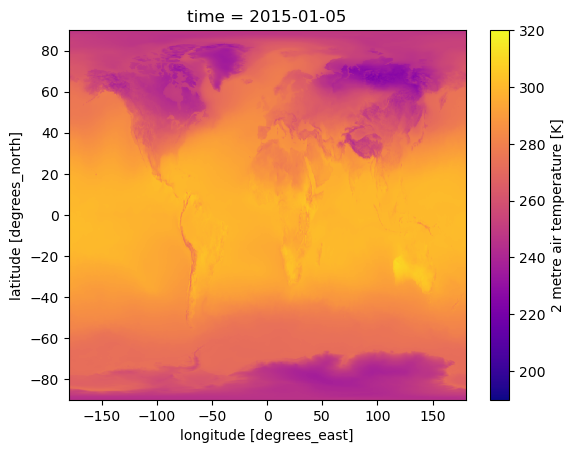

Uncaught exception GET /tiles/edc~hamburg-NDVI-RGB-subset.zarr/B02/11/661/1081?crs=EPSG%3A3857&vmin=0&vmax=1&cbar=bone&time=2021-08-30T00%3A00%3A00Z (127.0.0.1)
HTTPServerRequest(protocol='http', host='hub.eox.at', method='GET', uri='/tiles/edc~hamburg-NDVI-RGB-subset.zarr/B02/11/661/1081?crs=EPSG%3A3857&vmin=0&vmax=1&cbar=bone&time=2021-08-30T00%3A00%3A00Z', version='HTTP/1.1', remote_ip='127.0.0.1')
Traceback (most recent call last):
  File "/home/conda/eurodatacube6/7f27d6ca559de8798df237a2114a9440d8371b3c509a5646081d0b9c242e4f6c-20230620-101539-524672-159-xcube/lib/python3.11/site-packages/tornado/web.py", line 1786, in _execute
    result = await result
             ^^^^^^^^^^^^
  File "/home/conda/eurodatacube6/7f27d6ca559de8798df237a2114a9440d8371b3c509a5646081d0b9c242e4f6c-20230620-101539-524672-159-xcube/lib/python3.11/site-packages/xcube/server/webservers/tornado.py", line 354, in get
    await self._call_method('get', *args, **kwargs)
  File "/home/conda/eurodatacube6/7f27d6

In [29]:
var = dataset.air_temperature_2m.sel(time="2015-01-05 01:00:00", method="nearest")
var.plot.imshow(vmin=190, vmax=320, cmap="plasma")